In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

[2. 3. 4. 5.]
[1.         1.         1.         0.44119967]
[[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
  2.00000000e+00 2.00000000e+00]
 [4.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
  3.00000000e+00 3.00000000e+00]
 [5.00000000e+00 1.88020629e+08 6.46404104e-01 0.00000000e+00
  1.18393987e+02 2.68345594e+02]]
[2. 3. 4. 5.] [0.5        0.66666667 0.75       0.68823993]


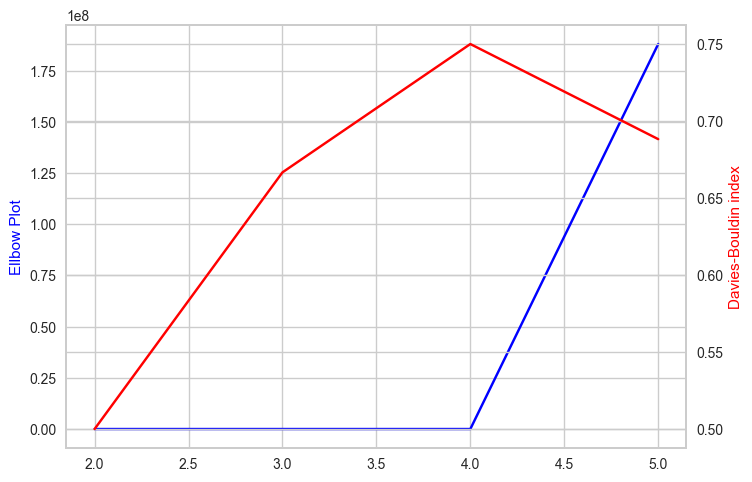

In [5]:
ordner = r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA.90_270_89.7849_29.0866/CLUSTER"
file = r"KMEANSslp_hpa_ERA5_1979-2014_jjas_atrbg_aacrm21_remapbnds_unnorm_all_cluster_totwithinsum_varratio_5PC"
path = ordner + "/" + file 
data = np.loadtxt (path, skiprows = 1)
#print(data[:,0])
clusternumber = data[:,0]
print(clusternumber)
inertia = data[:,1]
intra = data[:,4]
inter = data[:,5]
rel = intra/inter
print(rel)
sum_rel = np.zeros(len(inertia))
for i in range(len(inertia)):
    sum_rel[i]=sum(rel[:i+1])/(i+2)
print(data)
fig,ax = plt.subplots()
ax.plot(clusternumber, inertia,color='blue', label='Ellbow Plot')
ax2 = ax.twinx()
ax2.plot(clusternumber, sum_rel,color='red', label='Davies-Bouldin index')
ax2.set_ylabel("Davies-Bouldin index",color='red')
ax.set_ylabel("Ellbow Plot",color='blue',)
print(clusternumber, sum_rel)

In [4]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

ordner = r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA.-90_90_89.7849_29.0866/EOF"
file = r"PCslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_cos_cov_svd"
path = ordner + "/" + file 
data = np.loadtxt (path)
print(np.shape(data))
#ndimmax = 11
#data_dimmax = data[:,:ndimmax]
#df=pd.DataFrame(data_dimmax)


(5520, 10)


In [3]:
np.shape(df)

(5520, 10)

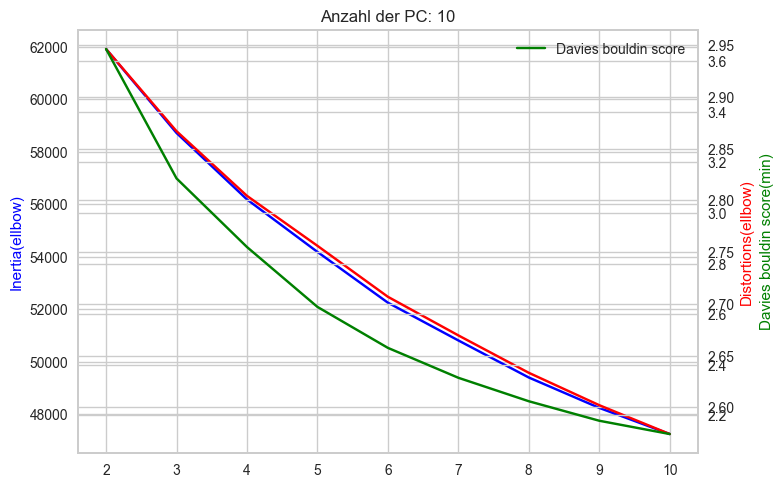

In [10]:
inertias = []
distortions = []
mapping1 = {}
mapping2 = {}
dbs = []
ndimmax = 11
data_dimmax = data[:,:ndimmax]
df=pd.DataFrame(data_dimmax)
K = range(2, 11)
for i  in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=100).fit(data_dimmax)
    labels = kmeans.labels_
    chs=metrics.calinski_harabasz_score(data_dimmax, labels)
    kmeans.fit(df)
    distortions.append(sum(np.min(cdist(data_dimmax, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / data_dimmax.shape[0])
    inertias.append(kmeans.inertia_)
    dbs.append(davies_bouldin_score(data_dimmax, labels))

    mapping1[i] = sum(np.min(cdist(data_dimmax, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / data_dimmax.shape[0]
    mapping2[i] = kmeans.inertia_
    

#plt.plot(K,inertias)
fig,ax = plt.subplots()
ax.plot(K, inertias,color='blue', label='Ellbow Plot- inertia')
ax.set_title("Anzahl der PC: " +str(ndimmax-1))
ax2 = ax.twinx()
ax2.plot(K, distortions,color='red', label='Ellbow Plot -distortions')
ax2.set_ylabel("Distortions(ellbow)",color='red')
ax.set_ylabel("Inertia(ellbow)",color='blue')
ax3= ax.twinx()
ax3.plot(K,dbs, color='green', label = 'Davies bouldin score')
ax3.legend()
ax3.set_ylabel('Davies bouldin score(min)',color='green')
ax3.yaxis.set_label_coords(1.1, 0.5)
plt.savefig("C:/Users/jomuel001/Desktop/plot.png")

In [85]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

ordner = r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA.-90_90_89.7849_29.0866/EOF"
file = r"PCslp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_cos_cov_svd_unnorm"
path = ordner + "/" + file 
data = np.loadtxt (path)
print(np.shape(data))

(5520, 10)


Dimension des Phasenraums:10


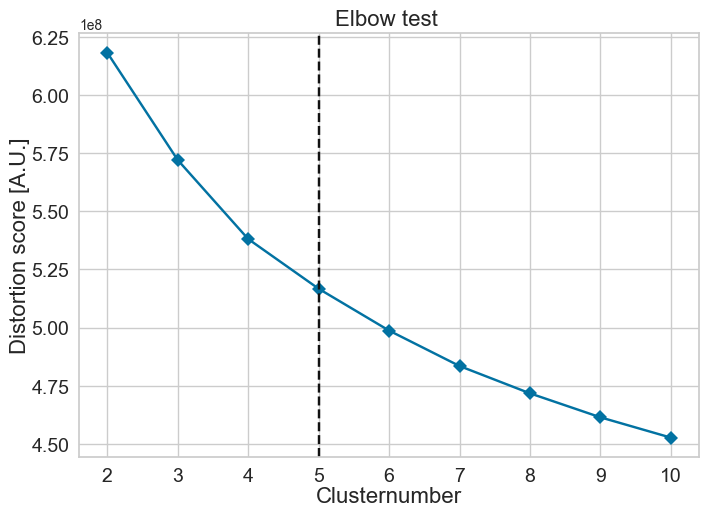

In [86]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
FONTSIZE=16
for i in range(11,12):#i geht bis 11
    ndimmax = i
    data_dimmax = data[:,:ndimmax] #i bis 11 also data_dimmax bis 10
    df=pd.DataFrame(data_dimmax)
# Load the IRIS dataset

# Instantiate the clustering model and visualizer
    km = KMeans(random_state=100)
    visualizer = KElbowVisualizer(km, k=(2,11),timings=False,metric='distortion')
    print("Dimension des Phasenraums:" + str(i-1))
    visualizer.fit(data_dimmax)        # Fit the data to the visualizer
    #visualizer.show()  
    plt.title("Elbow test ", fontsize=FONTSIZE)
    plt.xticks(fontsize=FONTSIZE-2)
    plt.yticks(fontsize=FONTSIZE-2)
    plt.xlabel('Clusternumber', labelpad=1, fontsize=FONTSIZE)
    plt.ylabel('Distortion score [A.U.]', labelpad=1, fontsize=FONTSIZE)
    plt.savefig("N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA.-90_90_89.7849_29.0866/CLUSTER/PLOTS/Distortion_score_MJJASO_pc"+str(i-1)+".png")
    plt.show()

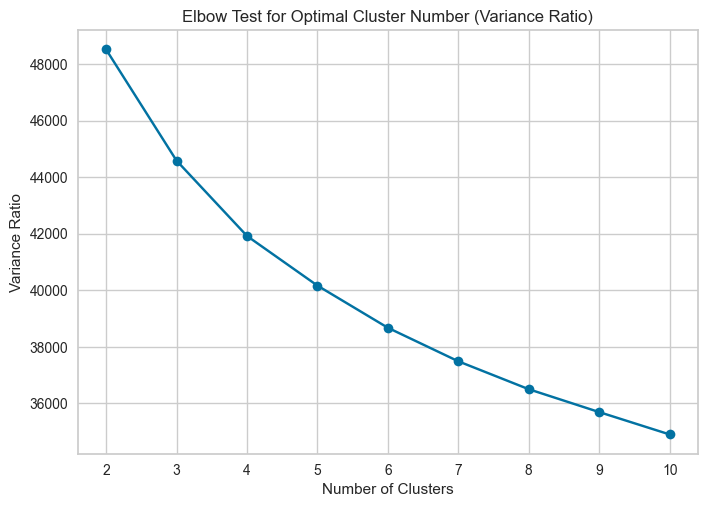

The knee point is at cluster number: 8


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'data' is a 5520x10 dimensional array
# Transpose the data to have shape (n_samples, n_features)
data = np.transpose(data)

# Calculate the total variance of the sample
total_variance = np.var(data)

# Initialize an empty list to store variance ratios
variance_ratios = []

# Define the range of cluster numbers you want to test (from 2 to 10)
cluster_range = range(2, 11)

# Perform the elbow test for different cluster numbers
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(data)
    
    # Calculate the sum of squared distances from each data point to its assigned cluster centroid
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    distances_squared = np.array([np.sum((data[i] - cluster_centers[labels[i]]) ** 2) for i in range(len(data))])
    
    # Calculate the within-cluster sum of squares
    within_cluster_sum_of_squares = np.sum(distances_squared)
    
    # Calculate the variance ratio for the current clustering solution
    variance_ratio = within_cluster_sum_of_squares / total_variance
    variance_ratios.append(variance_ratio)

# Plot the variance ratios against the cluster numbers
plt.plot(cluster_range, variance_ratios, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Ratio')
plt.title('Elbow Test for Optimal Cluster Number (Variance Ratio)')
plt.show()

# Calculate the angles between consecutive points
angles = []
for i in range(1, len(variance_ratios) - 1):
    prev_point = [cluster_range[i - 1], variance_ratios[i - 1]]
    curr_point = [cluster_range[i], variance_ratios[i]]
    next_point = [cluster_range[i + 1], variance_ratios[i + 1]]
    
    angle = np.abs(np.arctan2(curr_point[1] - prev_point[1], curr_point[0] - prev_point[0]) -
                   np.arctan2(next_point[1] - curr_point[1], next_point[0] - curr_point[0]))
    
    angles.append(angle)

# Find the knee point based on the maximum angle
knee_index = np.argmax(angles) + 1  # Add 1 since the angles array is one element shorter
knee_cluster_number = cluster_range[knee_index]

print(f"The knee point is at cluster number: {knee_cluster_number}")




In [79]:
angles

[0.00012094977354992764,
 0.00019406368532326468,
 0.00010121624488279579,
 0.0001727188140927538,
 0.00016962979270163103,
 0.0002231305359026159,
 2.8759695109403793e-05]

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'data' is a 5520x10 dimensional array
# Transpose the data to have shape (n_samples, n_features)
data = np.transpose(data)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define the range of cluster numbers you want to test (from 2 to 10)
cluster_range = range(2, 11)

# Perform the elbow test for different cluster numbers
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    # Calculate the silhouette score for the current clustering solution
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores against the cluster numbers
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Test for Optimal Cluster Number (Silhouette Score)')
plt.show()

# Find the elbow point based on the highest silhouette score
elbow_index = np.argmax(silhouette_scores)
elbow_cluster_number = cluster_range[elbow_index]

print(f"The elbow point is at cluster number: {elbow_cluster_number}")


ValueError: Number of labels is 10. Valid values are 2 to n_samples - 1 (inclusive)

[[-2.5254496e-01 -2.5036037e-01 -3.4879120e-01 ...  8.7053735e-01
   1.2150935e+00  6.5913223e-01]
 [ 1.6678735e-01 -1.1300395e-01 -1.5939859e-01 ...  2.3611127e+00
   1.2774159e+00  1.0683523e+00]
 [ 6.7141672e-01  1.8651175e-04 -5.6171439e-02 ...  2.6725765e+00
   9.2580433e-01  5.7015624e-01]
 ...
 [-7.5070698e-01 -3.6150718e-01  1.0191240e-01 ... -6.5299866e-01
  -1.9462552e+00  5.3945229e-02]
 [-8.8174253e-01  5.7457902e-01 -2.0267962e-01 ... -3.9006339e-01
  -1.7191586e+00  1.7431301e+00]
 [-5.9620065e-01  1.0644798e+00 -9.0166919e-01 ... -5.0443938e-01
   3.8205024e-01  2.6309694e+00]]
Number of clusters: 2, BIC value: 16388.623416680904
Number of clusters: 3, BIC value: 16060.819350605718
Number of clusters: 4, BIC value: 15814.453933919769
Number of clusters: 5, BIC value: 15616.782549125108
Number of clusters: 6, BIC value: 15468.245492205484
Number of clusters: 7, BIC value: 15329.391577947521
Number of clusters: 8, BIC value: 15244.730848142583
Number of clusters: 9, BIC va

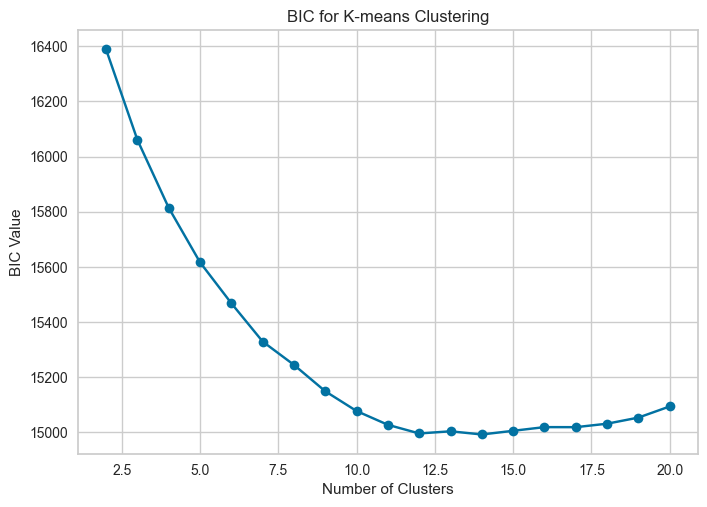

In [35]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
data=data_dimmax
print(data_dimmax)
# Set the range of cluster numbers to test
min_clusters = 2
max_clusters = 20

# Perform k-means clustering for different numbers of clusters
bic_values = []
for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    
    # Calculate the BIC value
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    distances = pairwise_distances(data, cluster_centers, metric='euclidean')
    intra_cluster_distances = np.sum(distances[np.arange(len(data)), labels])
    n_params = n_clusters * data.shape[1] + n_clusters - 1
    bic = intra_cluster_distances + np.log(len(data)) * n_params
    bic_values.append(bic)

# Print the BIC values for different numbers of clusters
for n_clusters, bic in zip(range(min_clusters, max_clusters+1), bic_values):
    print(f"Number of clusters: {n_clusters}, BIC value: {bic}")

plt.plot(range(min_clusters, max_clusters+1), bic_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Value')
plt.title('BIC for K-means Clustering')
plt.grid(True)
plt.show()

Average Silhouette Coefficient for 12 clusters: 0.07004369319299221


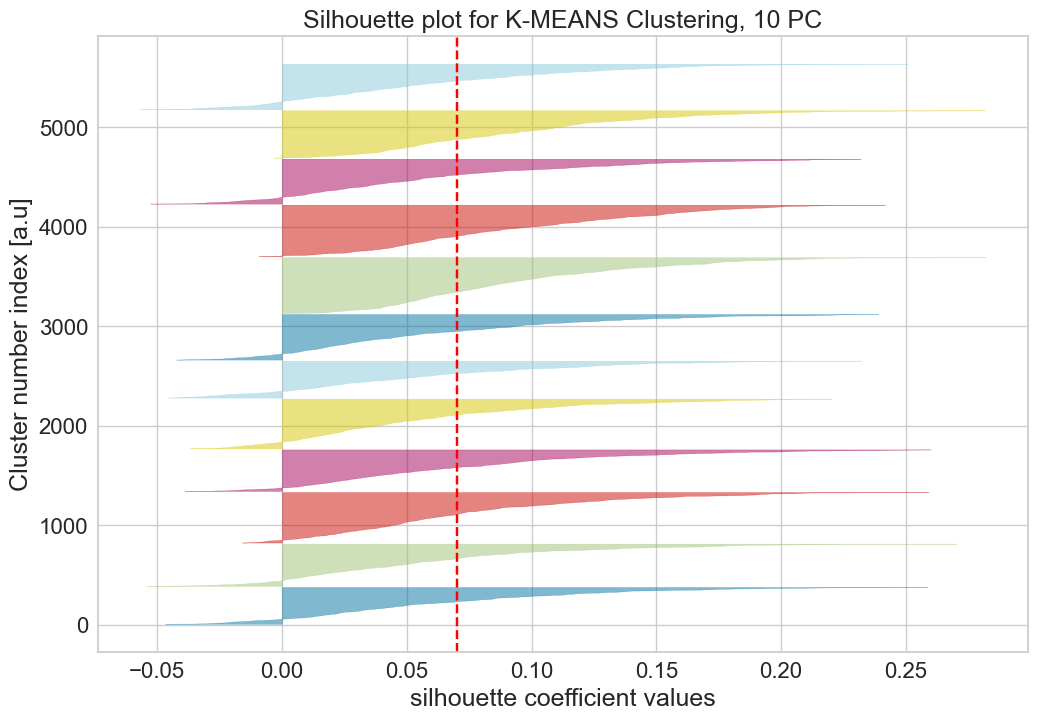

In [41]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

# Load the IRIS dataset
ndimmax = 11
FONTSIZE= 18
data_dimmax = data[:,:ndimmax]
df=pd.DataFrame(data_dimmax)
X = data_dimmax
zahl = 12
fig, ax = plt.subplots(1, 1, figsize=(12,8))
for i in [zahl]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=100, max_iter=100, random_state=100)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X) 
    
    silhouette_avg = visualizer.silhouette_score_
    sample_silhouette_values = visualizer.silhouette_samples_
    
    # Print the average silhouette coefficient
    print(f"Average Silhouette Coefficient for {i} clusters: {silhouette_avg}")

    
    plt.xticks(fontsize= FONTSIZE-2)
    plt.yticks(fontsize= FONTSIZE-2)
    plt.title("Silhouette plot for K-MEANS Clustering, "+str(ndimmax-1)+" PC",fontsize= FONTSIZE)
    plt.ylabel("Cluster number index [a.u]",fontsize= FONTSIZE)
    plt.xlabel("silhouette coefficient values",fontsize= FONTSIZE)
    plt.savefig(r"N:/atm_glomod/user/jomuel001/CMIP6_models/ERA5/AREA.90_270_89.7849_29.0866/CLUSTER/PLOTS/Silhouette_Vis_"+str(zahl)+"_MJJASO_PC"+str(ndimmax-1)+".png",dpi=300),

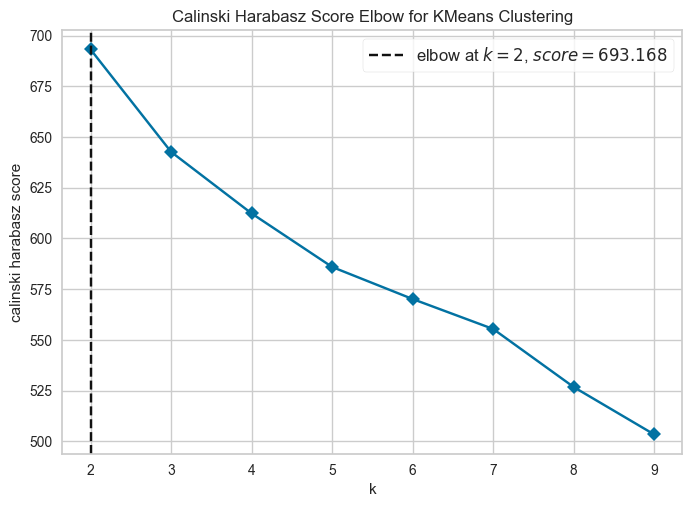

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [4]:
data_dimmax = data[:,:6]
X = data_dimmax

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 1: 0.0


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 2: 0.07154164417257942


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 3: 0.12905859245963072


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 4: 0.1827469974090724


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 5: 0.22821558172159742


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 6: 0.2704376236264156


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 7: 0.3101420675306258


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 8: 0.34430996032920796


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 9: 0.37940107559406794


C:\Users\jomuel001\WPy64-31101\python-3.11.0.amd64\Lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Variance Ratio of Original Dataset 10: 0.4107439689457444


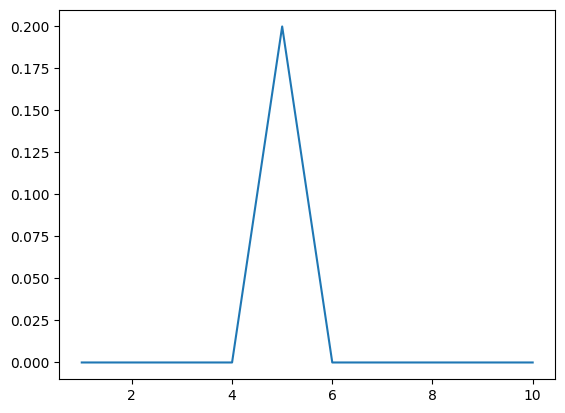

In [5]:
import numpy as np
from scipy.stats import skew
from sklearn.cluster import KMeans

# Define the original dataset (5520x10 shape)
original_data =data # Replace with your original dataset

# Define the number of synthetic datasets to generate
num_datasets = 500
min_cl=1
max_cl=11
lower_count=np.zeros(max_cl-min_cl)
percentage_lower=np.zeros(max_cl-min_cl)
cl_array=np.arange(min_cl,max_cl,1)
# Define the number of clusters for k-means clustering
for k in range(min_cl,max_cl):
    num_clusters = k


    # Calculate statistics of the original dataset
    original_mean = np.mean(original_data, axis=0)
    original_variance = np.var(original_data, axis=0)
    original_skewness = skew(original_data, axis=0)
    original_autocorr = np.corrcoef(original_data[:-1].T, original_data[1:].T)[np.arange(10), np.arange(10)]

    kmeans = KMeans(n_clusters=num_clusters, n_init=100, max_iter=100,algorithm='auto')
    labels = kmeans.fit_predict(original_data)
    centroids = kmeans.cluster_centers_
    within_cluster_var = np.mean([np.var(original_data[labels == i], axis=0) for i in range(num_clusters)], axis=0)
    centroid_var = np.var(centroids, axis=0)
    original_variance_ratio = np.mean(centroid_var) / np.mean(within_cluster_var)


    # Generate synthetic datasets
    synthetic_datasets = []
    for _ in range(num_datasets):
        # Resample data with replacement (bootstrap)
        resampled_data = original_data[np.random.choice(original_data.shape[0], size=original_data.shape[0], replace=True)]

        # Match the statistics of the original dataset
        resampled_data -= np.mean(resampled_data, axis=0)  # Center the resampled data
        resampled_data *= np.sqrt(original_variance) / np.sqrt(np.var(resampled_data, axis=0))  # Scale to match variance
        resampled_data += original_mean  # Shift to match mean
        resampled_data += original_skewness * (skew(resampled_data, axis=0) - original_skewness)  # Adjust skewness
        resampled_data[:-1] += original_autocorr * (resampled_data[1:] - resampled_data[:-1])  # Adjust autocorrelation

        # Append the synthetic dataset to the list
        synthetic_datasets.append(resampled_data)

    # Perform k-means clustering on each synthetic dataset and calculate variance ratios
    variance_ratios = []
    for synthetic_data in synthetic_datasets:
        kmeans = KMeans(n_clusters=num_clusters, n_init=100, max_iter=100,algorithm='lloyd')
        labels = kmeans.fit_predict(synthetic_data)
        centroids = kmeans.cluster_centers_
        within_cluster_var = np.mean([np.var(synthetic_data[labels == i], axis=0) for i in range(num_clusters)], axis=0)
        centroid_var = np.var(centroids, axis=0)
        variance_ratio = np.mean(centroid_var) / np.mean(within_cluster_var)
        variance_ratios.append(variance_ratio)
    print(f"Variance Ratio of Original Dataset {k}: {original_variance_ratio}")
    # Print the variance ratios for the synthetic datasets
    lower_count[k-1] = np.sum(variance_ratios < original_variance_ratio)
    percentage_lower[k-1] = (lower_count[k-1] / num_datasets) * 100
plt.plot(cl_array,percentage_lower)




In [4]:
import time

# Record the start time
start_time = time.time()

# Code to be executed in the cell
num_clusters = 5
original_data =data

# Calculate statistics of the original dataset
original_mean = np.mean(original_data, axis=0)
original_variance = np.var(original_data, axis=0)
original_skewness = skew(original_data, axis=0)
original_autocorr = np.corrcoef(original_data[:-1].T, original_data[1:].T)[np.arange(10), np.arange(10)]

kmeans = KMeans(n_clusters=num_clusters, n_init=100, max_iter=100,algorithm='auto')
labels = kmeans.fit_predict(original_data)
centroids = kmeans.cluster_centers_
within_cluster_var = np.mean([np.var(original_data[labels == i], axis=0) for i in range(num_clusters)], axis=0)
centroid_var = np.var(centroids, axis=0)
original_variance_ratio = np.mean(centroid_var) / np.mean(within_cluster_var)
print(f"Variance Ratio of Original Dataset {5}: {original_variance_ratio}")
# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


NameError: name 'skew' is not defined